<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
#import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical

from keras.callbacks import TensorBoard

# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [3]:
# insert code here
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

In [4]:
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [5]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [6]:
# insert code here
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [7]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

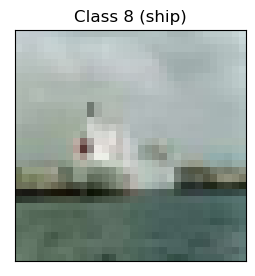

In [8]:
check_one(X_train, t_train.flatten())

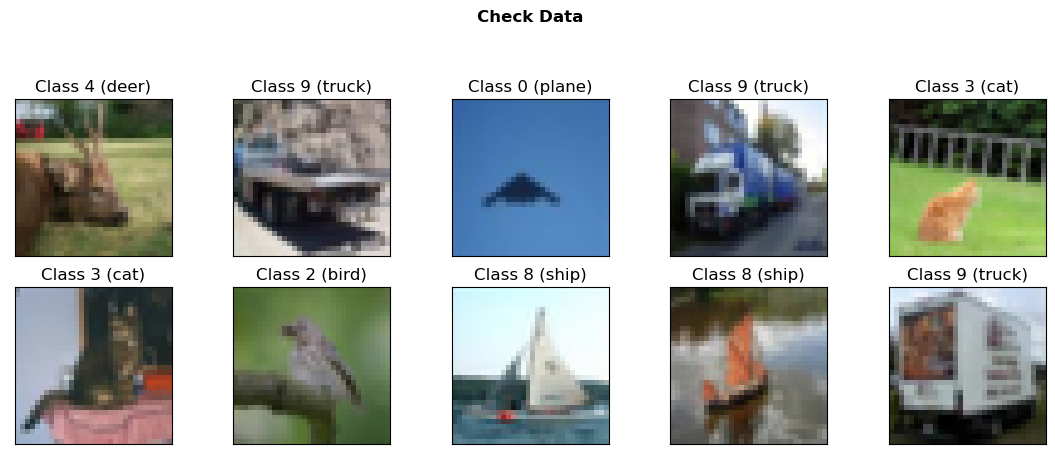

In [9]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [10]:
# insert code here
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [11]:
t_train[0]

array([6], dtype=uint8)

In [12]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [13]:
# insert code here
model = Sequential()

In [14]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 48)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 96)        41568     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 96)        83040     
                                                        

## Compile the model

In [16]:
# insert code here
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [17]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs
tensorboard = TensorBoard(log_dir = 'logs')

In [18]:
%%time
# insert code here
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 100,
    # batch_size = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 0)

print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')
# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv%load_ext tensorboard
# ..., callbacks = [tensorboard], ...

Training accuracy:0.78 validation accuracy:0.78 
Wall time: 2h 16min 17s


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [19]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [28]:
%%time
predictions = np.argmax(predictions, axis=-1)

Wall time: 0 ns


## Evaluate the model

In [29]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 9s 9ms/step - loss: 0.7622 - accuracy: 0.7682

Test loss: 0.762173, Test accuracy: 0.768200


In [30]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [31]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 915   3   7   2   1   0   0   0  43  29 
  1|  78 831   0   0   1   0   1   0  13  76 
  2| 454   1 457  10  30  30   9   4   5   0 
  3| 535   1  10 332   7  83  15   6   5   6 
  4| 423   0  17  11 516   4   9  17   3   0 
  5| 356   0  11  34  11 570   1  12   2   3 
  6| 303   1   7  17   1   2 661   0   8   0 
  7| 281   0   3   9  13  13   0 672   1   8 
  8| 145  10   0   2   0   3   0   0 821  19 
  9|  92  21   0   2   0   0   1   1   7 876 


## Visualisation of cost

In [33]:
print(model.history.history.keys())

dict_keys([])


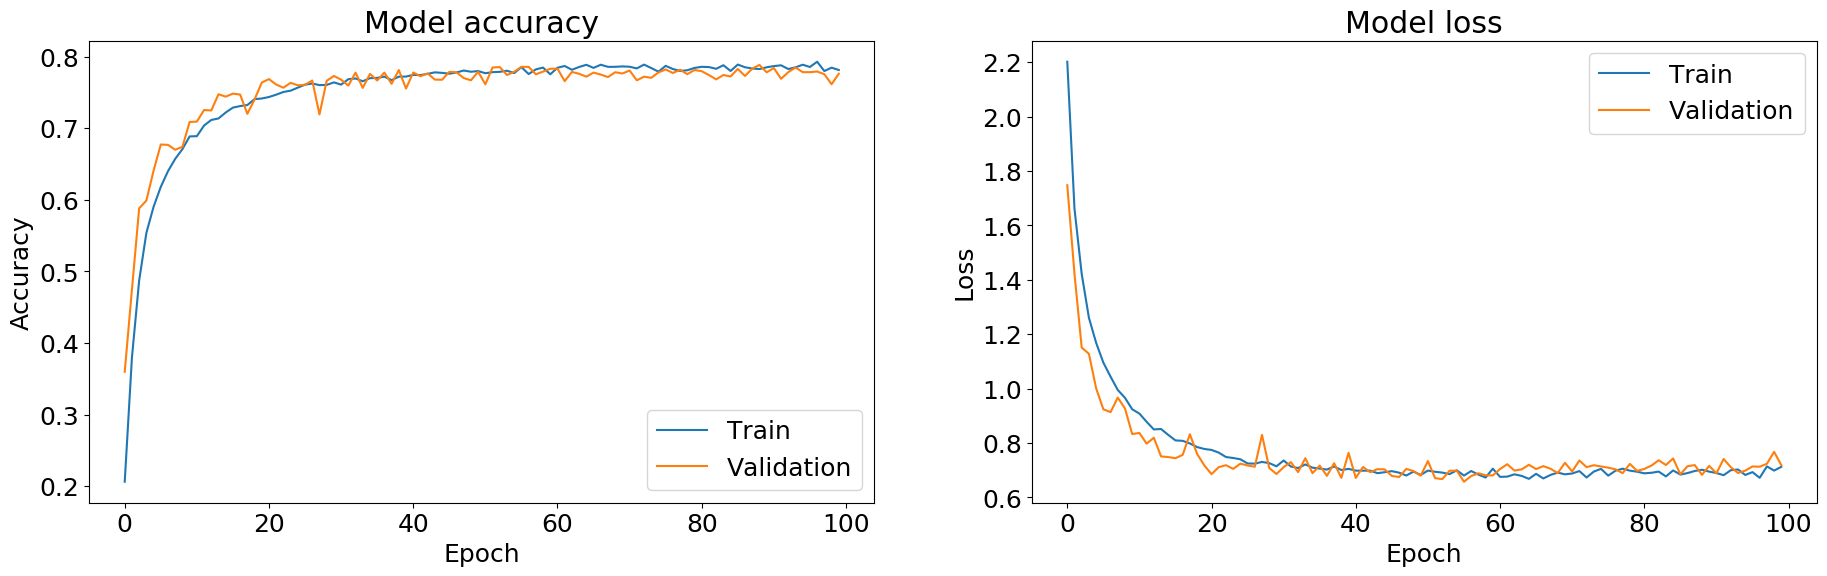

In [34]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

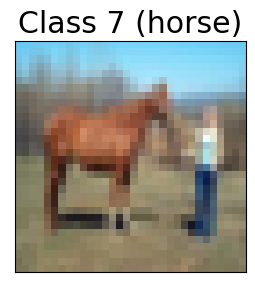

In [35]:
# insert code here
check_one(X_test, predictions, actual = y_test, compare = True)

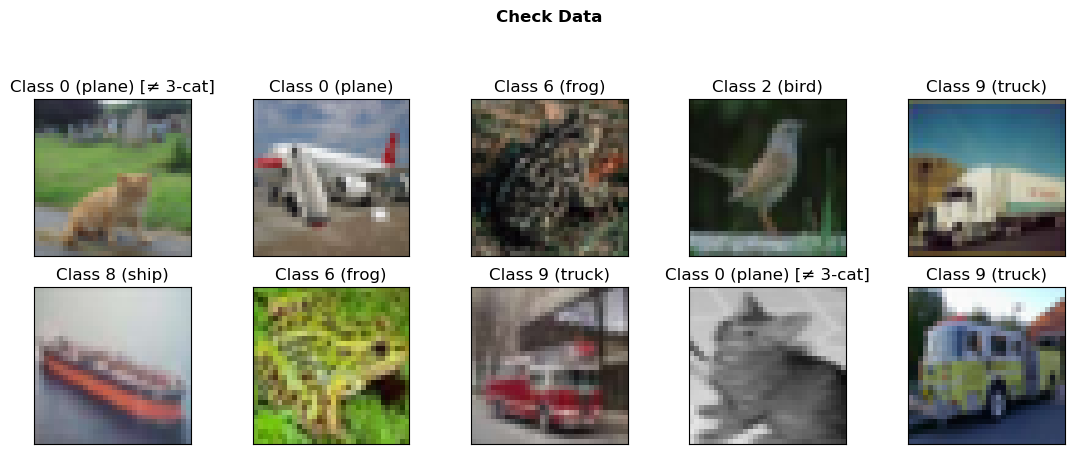

In [36]:
check_ten(X_test, predictions, y_test, True)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



